<a href="https://colab.research.google.com/github/Erikellerx/Projects_in_MLAI/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np

from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer
import warnings
import random
from mpl_toolkits import mplot3d
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!pwd
# https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
df = pd.read_csv('./drive/MyDrive/UzmaML/data.csv')
df.head()

/content


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
from sklearn import preprocessing

df.drop(['Unnamed: 32',"id"], axis=1, inplace=True)
#change M and B in prediction into 0 and 1
if "M" in df.diagnosis.values or "B" in df.diagnosis.values : 
  df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]
pred = df.diagnosis.values
data = df.drop(['diagnosis'], axis=1)
#normalization
data = ((data - np.min(data)) / (np.max(data) - np.min(data))).values

X_train, X_test, y_train, y_test = train_test_split(data, pred, test_size=0.2, random_state=42)
X,y = data, pred

In [5]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# Default Decision Tree

**Default Decision Tree**

This is a Decision trained on default parameters 

[Text(0.6145833333333334, 0.9375, 'X[7] <= 0.255\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.3958333333333333, 0.8125, 'X[20] <= 0.317\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.2916666666666667, 0.6875, 'X[10] <= 0.186\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.20833333333333334, 0.5625, 'X[24] <= 0.703\ngini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.16666666666666666, 0.4375, 'X[14] <= 0.054\ngini = 0.015\nsamples = 259\nvalue = [257, 2]'),
 Text(0.08333333333333333, 0.3125, 'X[21] <= 0.419\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.3125, 'X[21] <= 0.568\ngini = 0.008\nsamples = 252\nvalue = [251, 1]'),
 Text(0.20833333333333334, 0.1875, 'gini = 0.0\nsamples = 237\nvalue = [237, 0]'),
 Text(0.2916666666666667, 0.1875, 'X[21] <= 0.574\ngini = 0.124\nsamples = 15\nvalue 

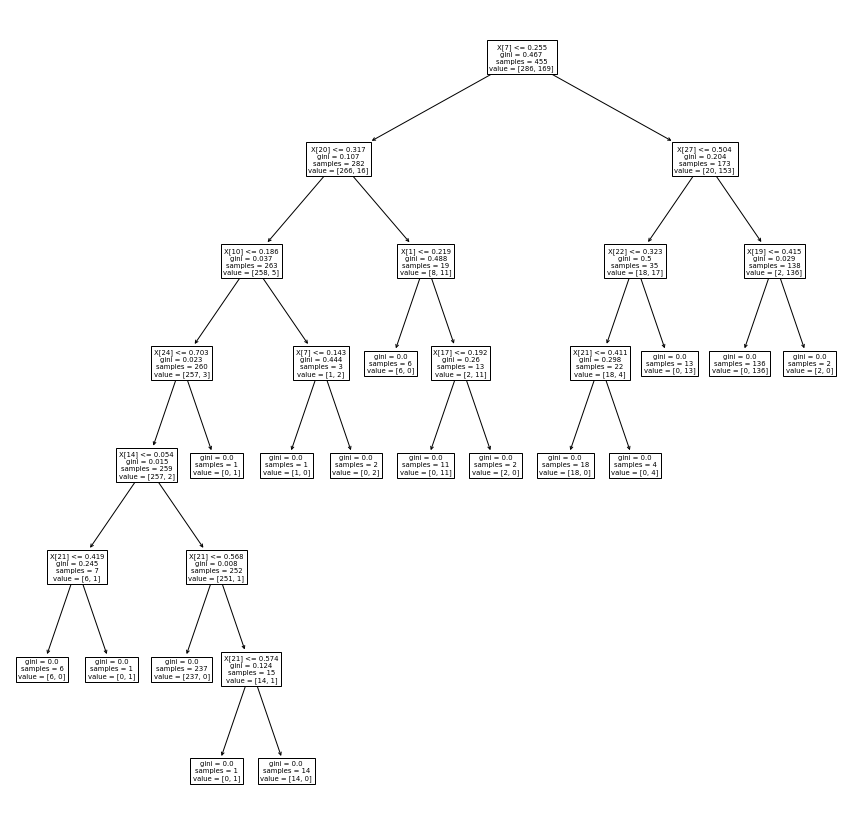

In [6]:
model = tree.DecisionTreeClassifier()
model = model.fit(X_train,y_train) 

plt.figure(figsize = (15, 15))
tree.plot_tree(model)

In [7]:
pred = model.predict(X_test)
f1_1 = f1_score(pred, y_test)
acc1 = accuracy_score(pred, y_test)

print(f"Acc: {acc1}")
print(f"F1: {f1_1}")

Acc: 0.9385964912280702
F1: 0.9176470588235294


#Turned Decision Tree

**Finding best max_depth and min_sample_spilt**

In this section, I am using grid search method to find the best combination of max_depth and min_sample_spilt in order to achieve better accuracy and f1 score. 

**max_depth**: The maximum depth of the tree. By turing this parameter, the tree depth/size can be limited in an ideal way to pervent overfitting and better testing result. However, considering the size of this dataset, this number should be relative small.

**min_sample_split**: The minimum number of samples required to split an internal node. Consider the size of this dataset is relative small, it is a good idea that we increase this number a bit to prevent overfitting. I observe that the default tree has a lot of leaf node that has only one data point in it. The default model may, therefore, easily overfit by those potentially noise data. 

**Result**:

If the max_depth is really small, the model will underfit and achieve a really bed result. However, as this number increases, the performance increase dramatically and reach its highest level at about 3~5. Then it will drop out accuracy by a little and doesn't affect our model mostly. Since our actual depth will be highly unlikely to reach our max depth threshold. Similarlly, min_sample_split behave the same but doesn't really affect this model's performance. The peak accuracy score is between 2 to 5 for min_sample_split. 



Best max_depth = 3, 
Best min_samples_split = 2
The best acc score = 0.9473684210526315
F1 score = 0.9285714285714286


Text(0.5, 0, 'Acc')

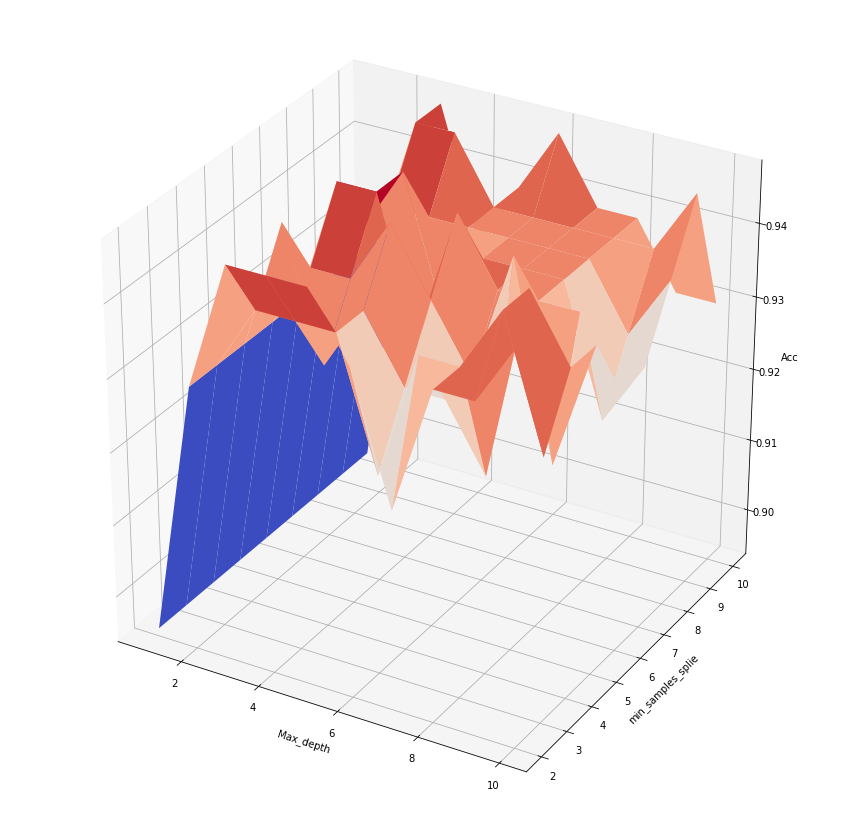

In [26]:
depth = np.array([1,2,3,4,5,6,7,8,9,10])
split = np.array([2,3,4,5,6,7,8,9,10])
score = []
maxacc = 0
maxd = 0
maxs = 0
bestmodel = None
bestf1 = 0

for d in depth:
  acclist = []
  for s in split:
    model = tree.DecisionTreeClassifier(max_depth = d, min_samples_split = s)
    model = model.fit(X_train,y_train) 
    pred = model.predict(X_test)
    temp = accuracy_score(pred, y_test)
    acclist.append(temp)
    if maxacc < temp:
      maxacc = temp
      maxd = d
      maxs = s 
      bestmodel = model
      bestf1 = f1_score(pred, y_test)
  score.append(acclist)

score = np.array(score).T
print(f"Best max_depth = {maxd}, \nBest min_samples_split = {maxs}")
print(f"The best acc score = {maxacc}")
print(f"F1 score = {bestf1}")

plt.figure(figsize = (15, 15))
ax = plt.axes(projection = '3d')
A,B = np.meshgrid(depth, split)
surf = ax.plot_surface(A, B, score, cmap=cm.coolwarm)
ax.set_xlabel("Max_depth")
ax.set_ylabel("min_samples_splie")
ax.set_zlabel("Acc")

[Text(0.5, 0.875, 'X[7] <= 0.255\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.25, 0.625, 'X[20] <= 0.317\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.125, 0.375, 'X[13] <= 0.078\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.375, 0.375, 'X[1] <= 0.219\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.75, 0.625, 'X[27] <= 0.504\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'),
 Text(0.625, 0.375, 'X[22] <= 0.323\ngini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.875, 0.375, 'X[16] <= 0.343\ngini = 0.029\nsamples = 138\nvalue = [2, 136]')

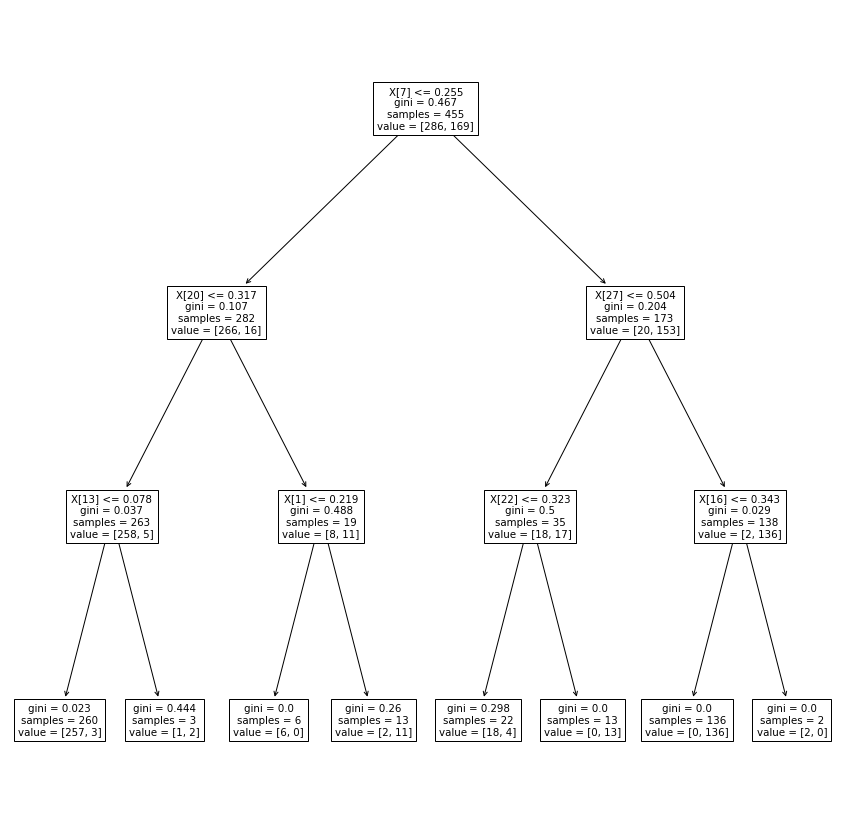

In [9]:
plt.figure(figsize = (15, 15))
tree.plot_tree(bestmodel)

# Bagging


**Optimized based on accuracy**

In [10]:
model = BaggingClassifier(n_estimators=20)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
acc2 = np.mean(n_scores)

Accuracy: 0.950 (0.022)


**Optimized based on F1**

In [11]:
model = BaggingClassifier(n_estimators=20)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
n_scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')

print('f1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
f1_2 = np.mean(n_scores)

f1: 0.934 (0.028)


# Boosting

**Optimized based on accuracy**

In [12]:
model = AdaBoostClassifier(n_estimators=20) 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
acc3 = np.mean(n_scores)

Accuracy: 0.958 (0.021)


**Optimized based on F1**

In [13]:
model = AdaBoostClassifier(n_estimators=20) 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
n_scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')

print('f1: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
f1_3 = np.mean(n_scores)

f1: 0.943 (0.028)


I implement both Bagging and Boosting trying to improve our performance of default decision tree. I both set n_estimators to 20 for comparision, and I both set n_repeat to 10 since the dataset is relatively small and it won't take too much time runing cross validation for 10 times. However, I did decrease n_splits to 5 since there are only about 500 datasets and 100 is merely enough to train our model. The result as shown above did a decent improvemen compared to default decision and even turned decision tree. 

For comparision, I both utilize accuracy and f1_score to optimize my model using cross validation. As the result shown above, both means of optimization increase the acc/f1 to some extent. Within bagging and boosting, boosting method using adabosst is slightly better than bagging. The main reason I believe is that our default model can capture most variance of our data. Therefore, boosting in this case can reduce our bias to achieve even better score. Nevertheless, the difference is marginal. 

# Analysis


For the three model above, I use accuracy as my metric since the T/F rate in my data set is relatively balanced. I also used f1 score in task 1 as a reference. Results show that there aren't any difference between f1 score and accuracy. 

In this notebook, I implement four different sets of models: decision tree with default param, decision tree with turned param, Bagging, and Boosting using adaboost. I both used f1 score and accuracy as my metrics to optimize bagging and boosting. The result comparsion shows below. There are indeed some improvements if we implement bagging and boosting. However, consider the size of dataset, the improvement isn't large but still noticeable. 

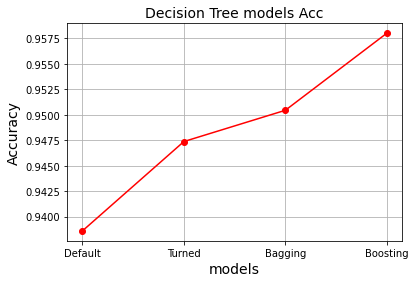

In [27]:
resultacc = [acc1, maxacc, acc2, acc3]
label = ["Default", "Turned", "Bagging", "Boosting"]

plt.plot(label, resultacc, color='red', marker='o')
plt.title('Decision Tree models Acc', fontsize=14)
plt.xlabel('models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

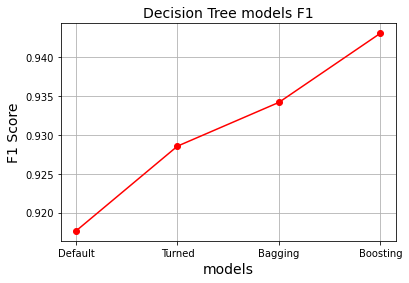

In [28]:
resultacc = [f1_1, bestf1, f1_2, f1_3]
label = ["Default", "Turned", "Bagging", "Boosting"]

plt.plot(label, resultacc, color='red', marker='o')
plt.title('Decision Tree models F1', fontsize=14)
plt.xlabel('models', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.grid(True)
plt.show()